In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# **1. Carga del dataset**

In [ ]:
#Cargar el archivo JSON con las credenciales de autenticación de Kaggle utilizando Google Colab.
from google.colab import files
files.upload()

#Instalar la API de Kaggle
!pip install kaggle

#Mover el archivo JSON de autenticación a la ubicación correcta
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Descargar los datos de la competición "Playground Series - S3E20" desde Kaggle
!kaggle competitions download -c playground-series-s3e20

#Descomprimir el archivo ZIP descargado
!unzip playground-series-s3e20.zip

Saving playground-series-s3e20.zip to playground-series-s3e20 (1).zip
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Archive:  playground-series-s3e20.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('train.csv')
df.shape

# **2. Preprocesado**

## 2.1. Análisis de datos atípicos en la variable respuesta

81.94055161320314


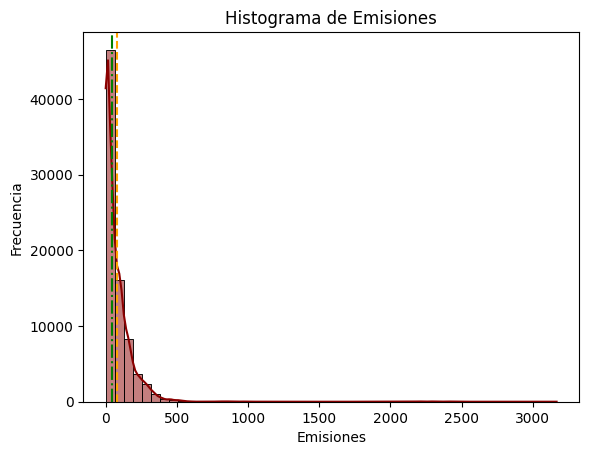

In [ ]:
sns.histplot(df['emission'], bins=50, kde=True, color='darkred')
media = df['emission'].mean()
print(media)
mediana = df['emission'].median()

# líneas verticales en la media y la mediana
plt.axvline(x=media, color='orange', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(x=mediana, color='green', linestyle='-.', label=f'Mediana: {mediana:.2f}')

plt.xlabel('Emisiones')
plt.ylabel('Frecuencia')
plt.title('Histograma de Emisiones')
plt.show()

In [ ]:
#Para eliminar las filas que no cumplen una condición
#df_new = df[df['emission'] < 400]

Cantidad y porcentaje de datos por encima de un rango

In [ ]:
rango = 500
conteo = len(df[df['emission'] >= rango])
porcentaje = conteo * 100 / df.shape[0]
print('Mayores a:',rango,'  Total:',conteo, '  Porcentaje:', round(porcentaje, 3))

rango = 1000
conteo = len(df[df['emission'] >= rango])
porcentaje = conteo * 100 / df.shape[0]
print('Mayores a:',rango,'  Total:',conteo, '  Porcentaje:', round(porcentaje, 3))

rango = 1500
conteo = len(df[df['emission'] >= rango])
porcentaje = conteo * 100 / df.shape[0]
print('Mayores a:',rango,'  Total:',conteo, '  Porcentaje:', round(porcentaje, 3))

rango = 2000
conteo = len(df[df['emission'] >= rango])
porcentaje = conteo * 100 / df.shape[0]
print('Mayores a:',rango,'  Total:',conteo, '  Porcentaje:', round(porcentaje, 3))

rango = 2500
conteo = len(df[df['emission'] >= rango])
porcentaje = conteo * 100 / df.shape[0]
print('Mayores a:',rango,'  Total:',conteo, '  Porcentaje:', round(porcentaje, 3))

rango = 3000
conteo = len(df[df['emission'] >= rango])
porcentaje = conteo * 100 / df.shape[0]
print('Mayores a:',rango,'  Total:',conteo, '  Porcentaje:', round(porcentaje, 3))

Mayores a: 500   Total: 514   Porcentaje: 0.65
Mayores a: 1000   Total: 198   Porcentaje: 0.251
Mayores a: 1500   Total: 187   Porcentaje: 0.237
Mayores a: 2000   Total: 174   Porcentaje: 0.22
Mayores a: 2500   Total: 30   Porcentaje: 0.038
Mayores a: 3000   Total: 11   Porcentaje: 0.014


Gráfica de serie de tiempo

<Axes: >

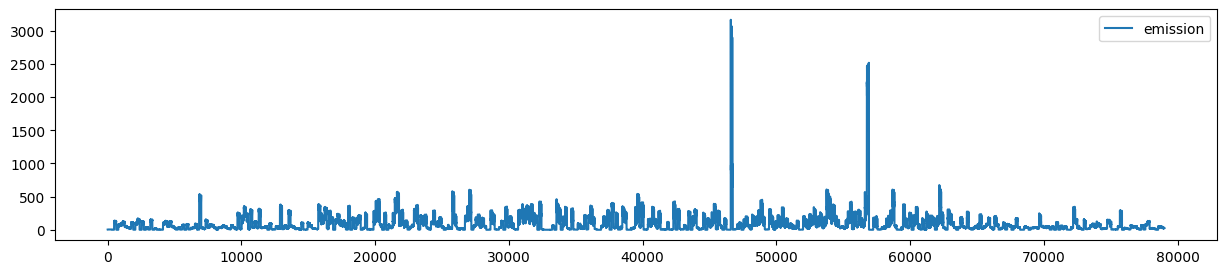

In [ ]:
df[["emission"]].plot(figsize=(15,3))

##2.2. Observación de datos faltantes
sampling from an equivalent normal

Observacion de datos faltantes y porcentajes

In [ ]:
for column in df.columns:
  conteo = df[column].isna().sum()
  print(column,":", conteo/df.shape[0] * 100)

In [ ]:
total           = df.isnull().sum().sort_values(ascending=False)
percent         = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train.tail(20)

##2.3. Eliminacion de columnas con mas del 50% de datos faltantes

In [ ]:
df1 = df.copy()
umbral = len(df) * 0.5
df1 = df1.dropna(thresh=umbral, axis=1)
df1.shape[1]

69

In [ ]:
def show_na(colum_name):
  missing_data = df[colum_name].isnull()

  # Crear un gráfico de barras para visualizar los datos faltantes
  plt.figure(figsize=(4, 6))
  missing_data.value_counts().plot(kind='bar', color='red', alpha=0.6)
  plt.title('Gráfico de Datos Faltantes en ' + colum_name)
  plt.xlabel('Datos Faltantes (NaN) vs. Datos No Faltantes')
  plt.xticks([0, 1], ['No Faltantes', 'Faltantes'])
  plt.show()

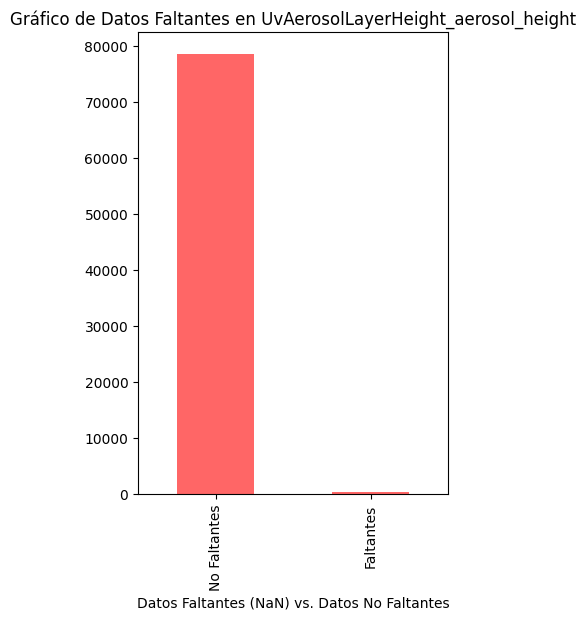

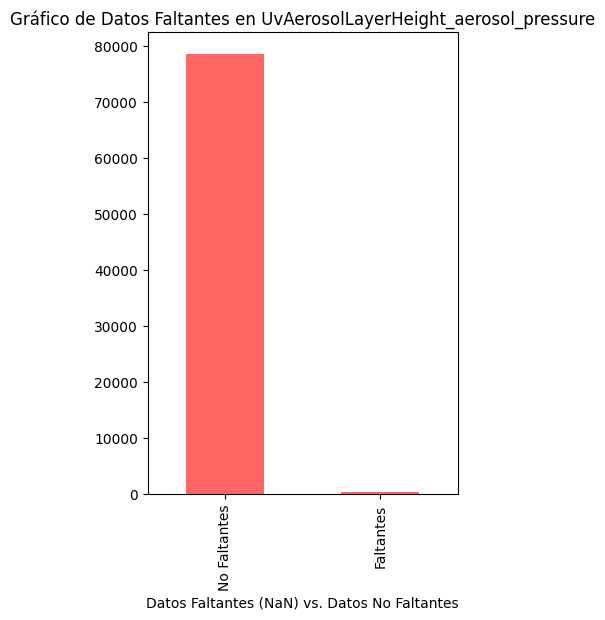

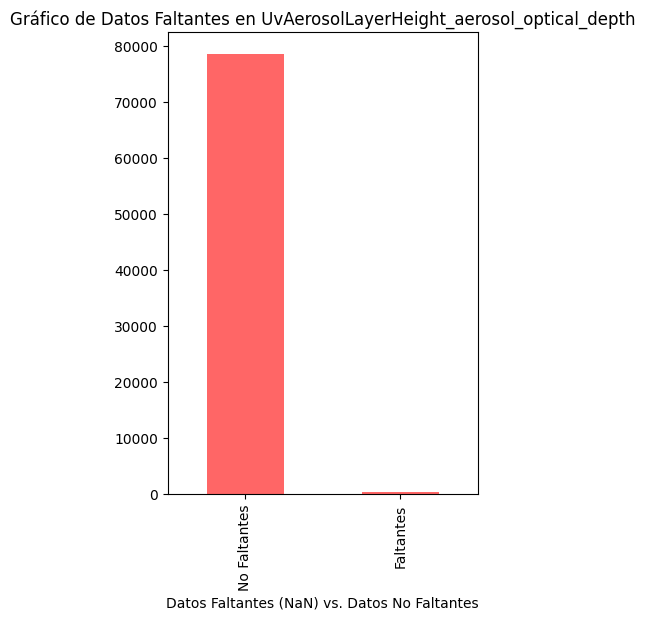

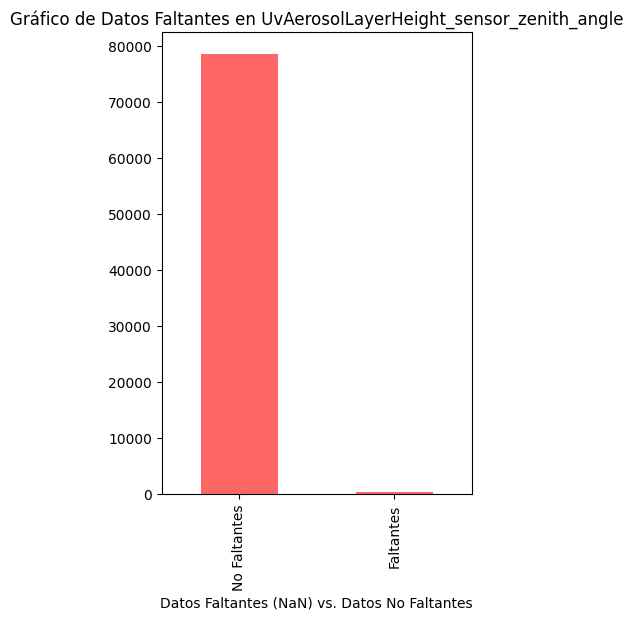

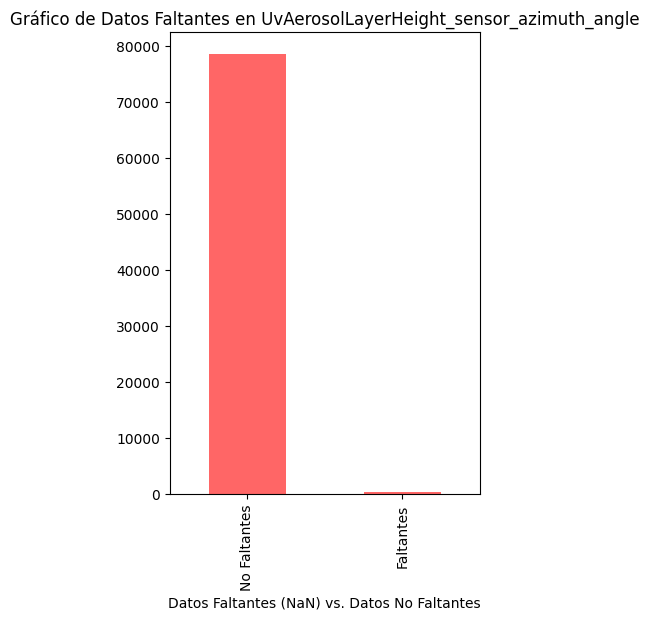

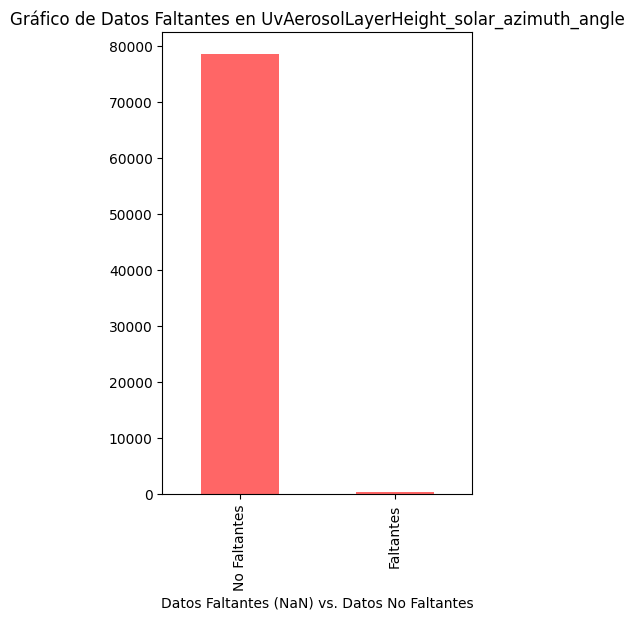

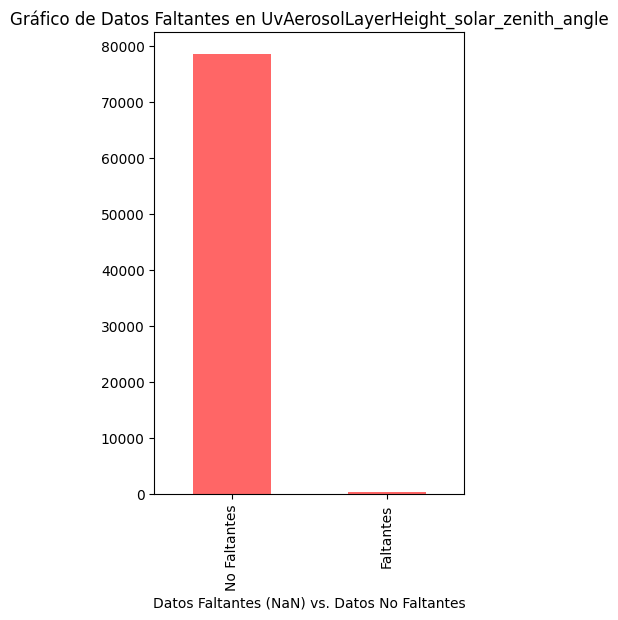

In [ ]:
for column in df.columns:
  p = (df[column].isnull().sum() / len(df[column])) * 100
  if p >= 50:
    # print(column, p)
    show_na(column)

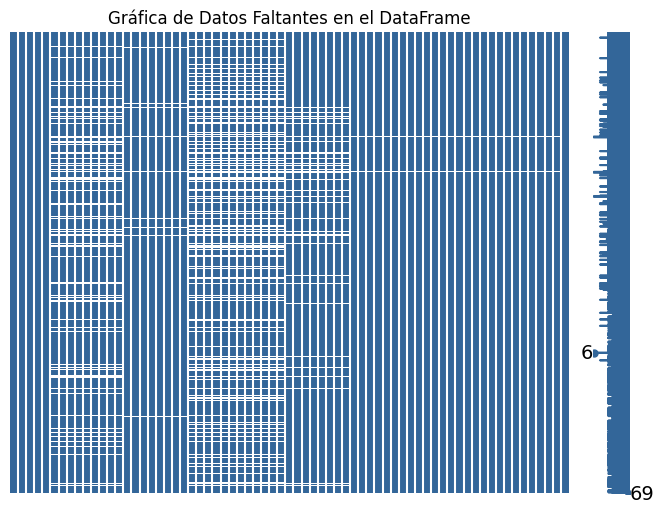

In [ ]:
msno.matrix(df1, figsize=(8, 6), color=(0.2, 0.4, 0.6))

plt.title('Gráfica de Datos Faltantes en el DataFrame')
plt.yticks([])
plt.show()

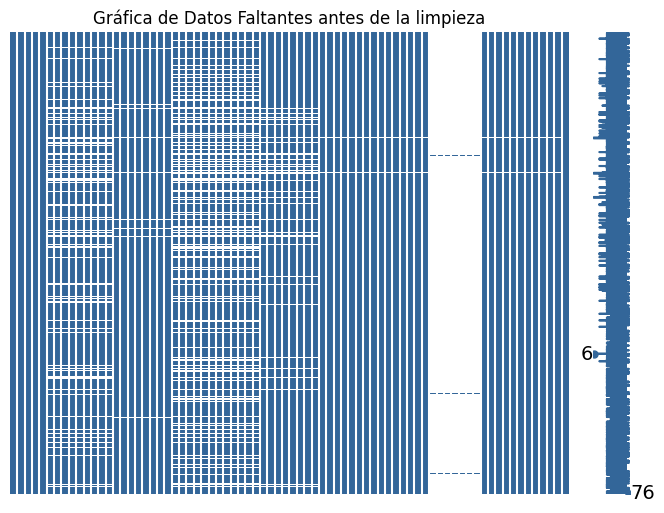

In [ ]:
msno.matrix(df, figsize=(8, 6), color=(0.2, 0.4, 0.6))

plt.title('Gráfica de Datos Faltantes antes de la limpieza')
plt.yticks([])
plt.show()

##2.4. Manejo de datos faltantes con un sample de distribucion normal


Dado que los datos estan presentados por localizacion cada semana de los años presentados en el data set. Haremos un sample  con dsitribución normal del cual se reemplazara el dato faltante con el que este ubicado en la poscición de este en la muestra.


In [ ]:
def fillna(df1):
    for columna in df1.columns:
      Agrupacion_lati = df1.groupby('latitude')

      if pd.api.types.is_numeric_dtype(df1[columna]):
          faltantes = df1[columna].isna()
          mu = df1.loc[~faltantes, columna].mean()
          std = df1.loc[~faltantes, columna].std()
          sample = np.random.normal(mu, std, len(df1[faltantes]))
          df1.loc[faltantes, columna] = sample

    return df1


In [ ]:
df1=fillna(df1)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 69 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  79023 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              79023 non-null  int64  
 7   SulphurDioxide_SO2_slant_column_number_density            79023 non-null  float64
 8   SulphurDioxide_c

In [ ]:
df1

Visualización de porcentajes faltantes

In [ ]:
total           = df1.isnull().sum().sort_values(ascending=False)
percent         = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending=False)
missing_train  = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_train.tail(20)

Total  Percent
year                                                    0      0.0
longitude                                               0      0.0
CarbonMonoxide_cloud_height                             0      0.0
CarbonMonoxide_sensor_altitude                          0      0.0
CarbonMonoxide_sensor_azimuth_angle                     0      0.0
CarbonMonoxide_sensor_zenith_angle                      0      0.0
CarbonMonoxide_solar_azimuth_angle                      0      0.0
CarbonMonoxide_solar_zenith_angle                       0      0.0
NitrogenDioxide_NO2_column_number_density               0      0.0
NitrogenDioxide_tropospheric_NO2_column_number_...      0      0.0
NitrogenDioxide_stratospheric_NO2_column_number...      0      0.0
NitrogenDioxide_NO2_slant_column_number_density         0      0.0
NitrogenDioxide_tropopause_pressure                     0      0.0
NitrogenDioxide_absorbing_aerosol_index                 0      0.0
NitrogenDioxide_cloud_fraction                          0      0.0
NitrogenDioxide_sensor_altitude                         0      0.0
NitrogenDioxide_sensor_azimuth_angle                    0      0.0
NitrogenDioxide_sensor_zenith_angle                     0      0.0
NitrogenDioxide_solar_azimuth_angle                     0      0.0
emission                                                0      0.0

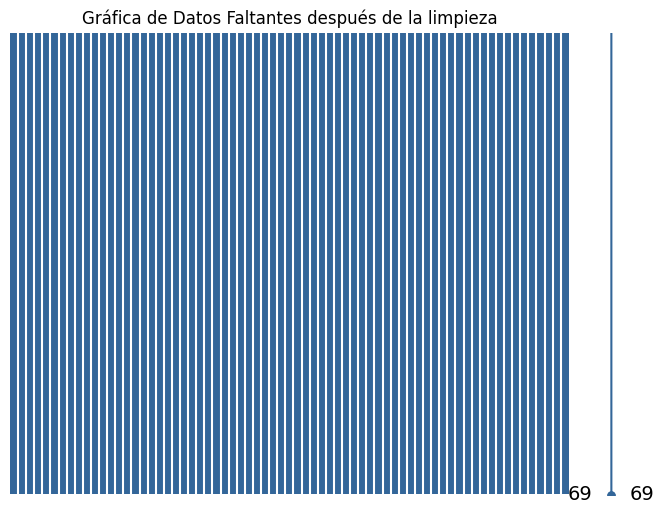

In [ ]:
msno.matrix(df1, figsize=(8, 6), color=(0.2, 0.4, 0.6))

plt.title('Gráfica de Datos Faltantes después de la limpieza')
plt.yticks([])
plt.show()

##2.5. Porcentaje minimo de variables categoricas
para cumplir con el minimo de 10% de variabless categoricas vamos a escoger las columnas con menor correlación, para proceder a discretizar en intervalos y en cada intervalo categorizar con un número entero

<ipython-input-55-06b4e0232469>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


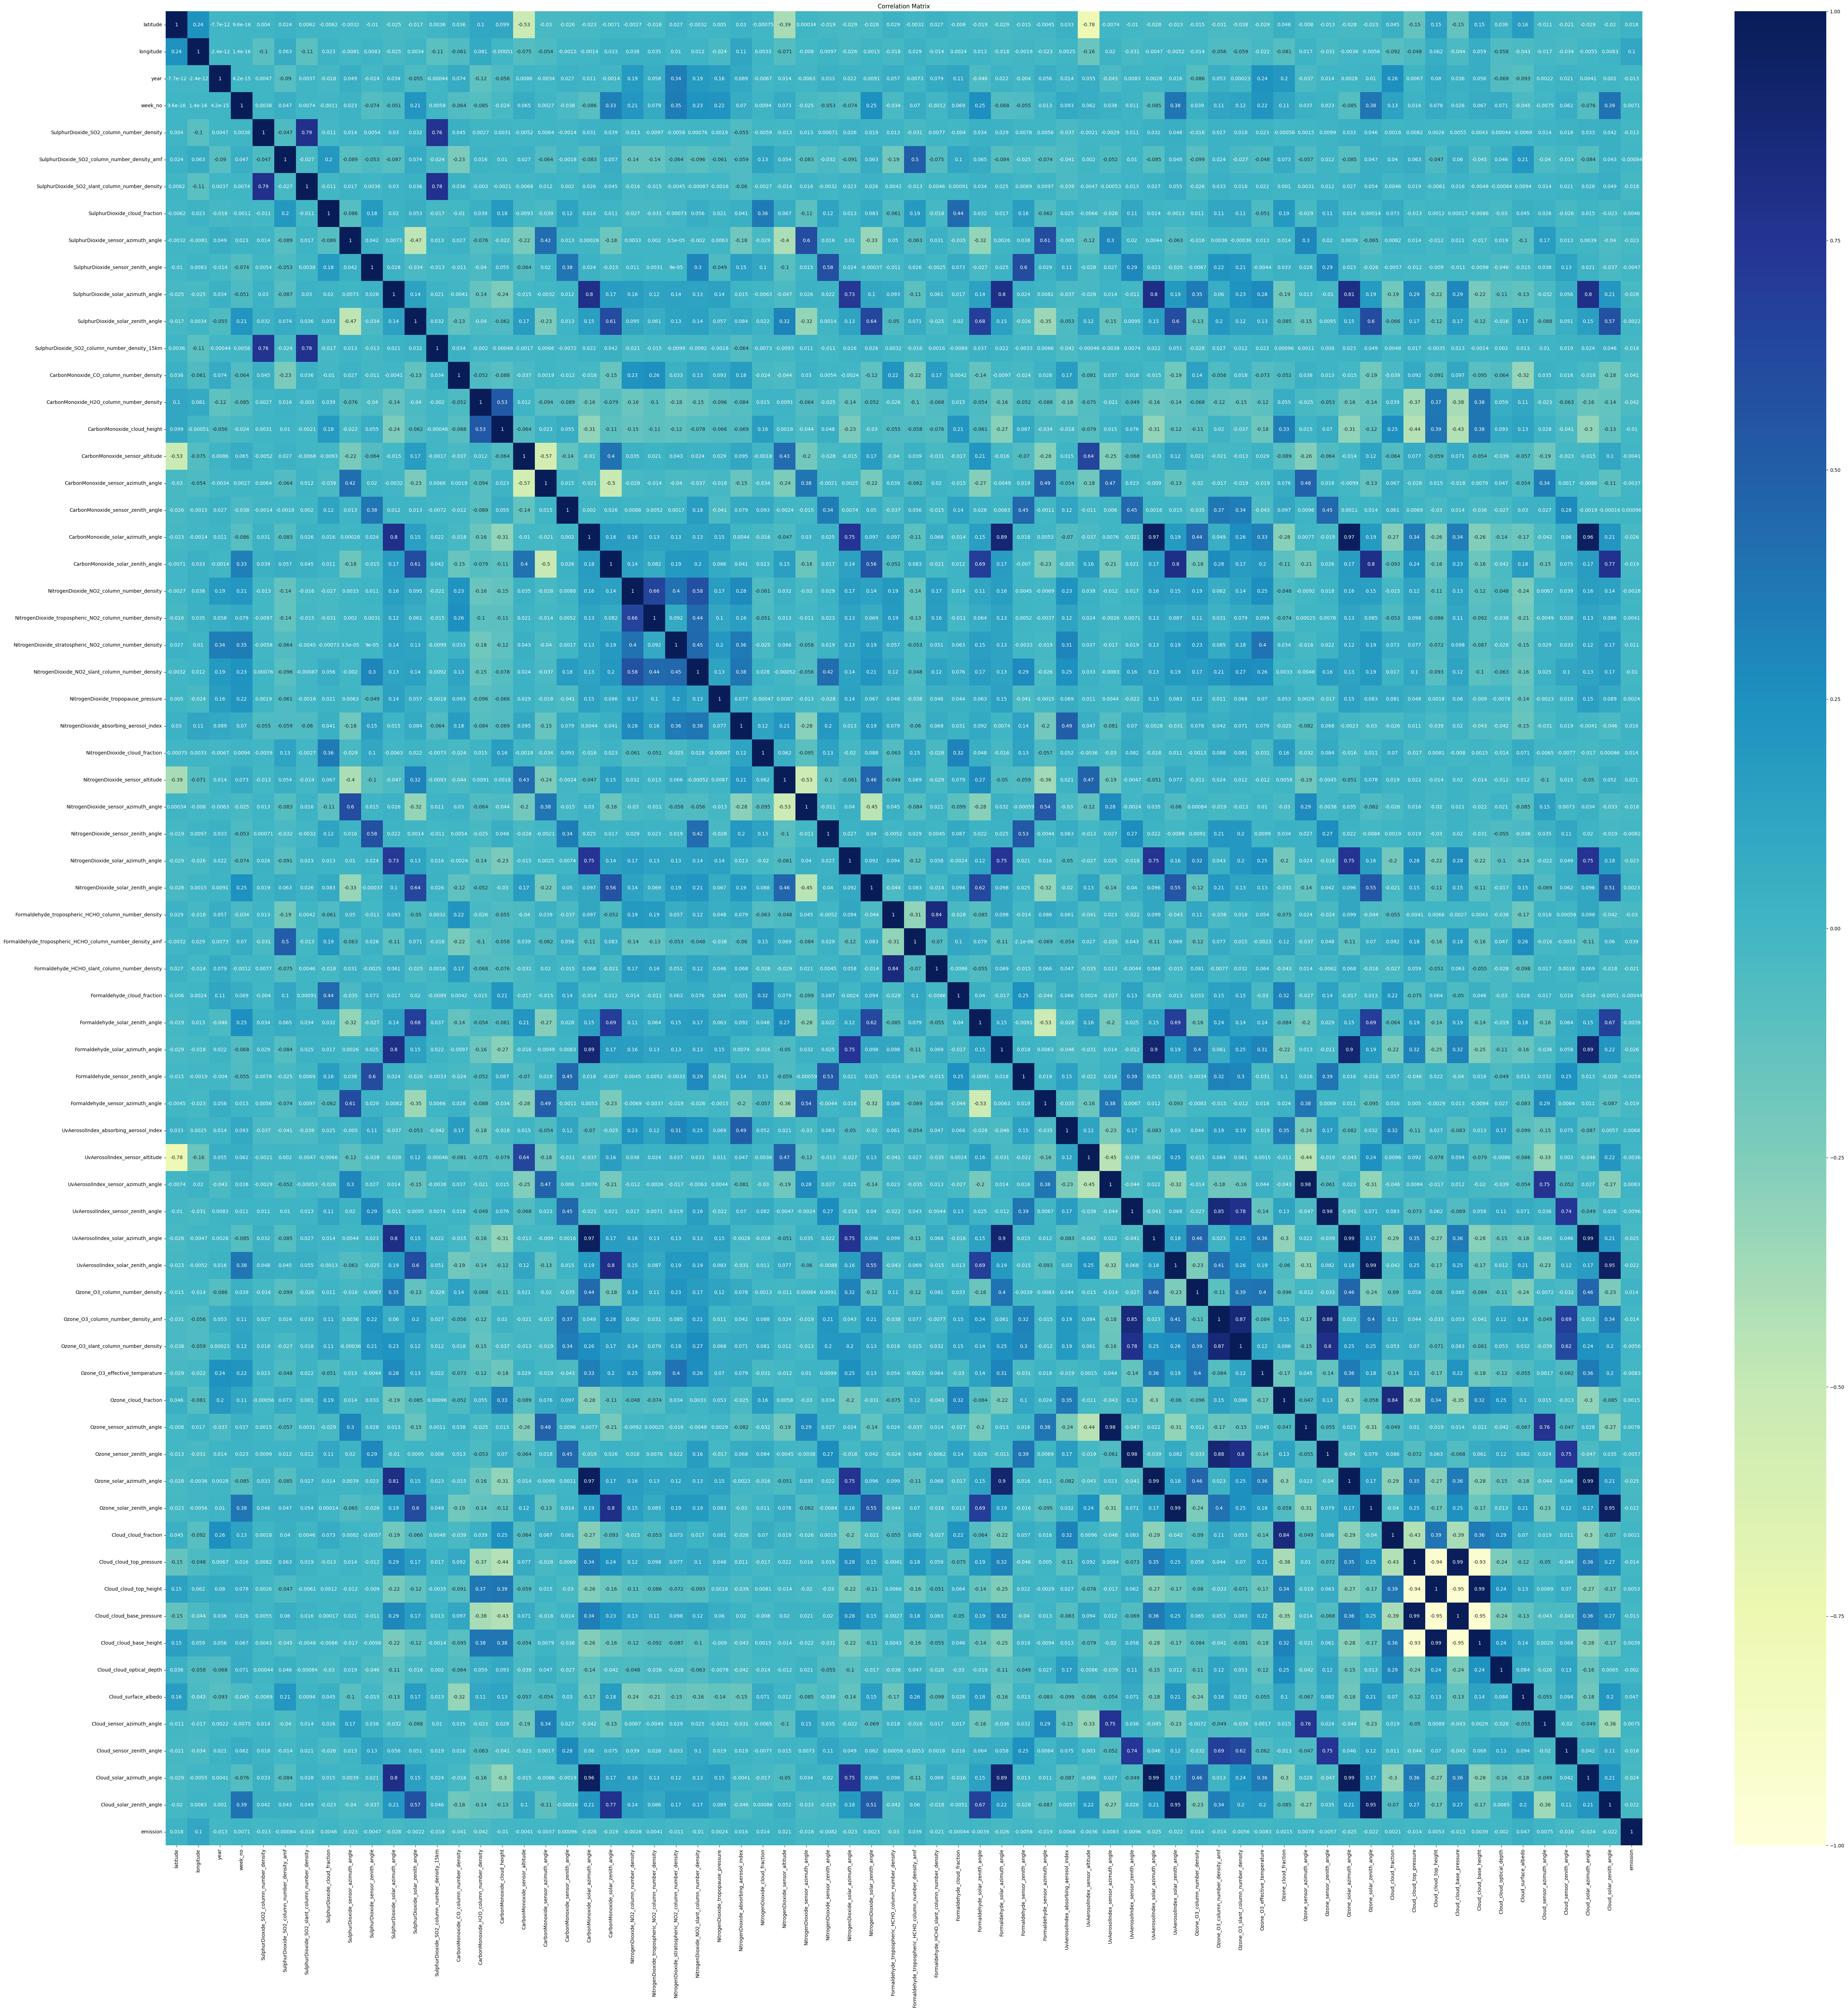

In [ ]:
corr_matrix = df1.corr()

plt.figure(figsize=(68,68))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = df1.corr()
columnas_a_discretizar = correlation_matrix['emission'].abs().nsmallest(8).index
columnas_a_discretizar

<ipython-input-37-7871ffe10965>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


Index(['CarbonMonoxide_sensor_zenith_angle',
       'NitrogenDioxide_tropopause_pressure',
       'SulphurDioxide_SO2_column_number_density_amf', 'Ozone_cloud_fraction',
       'Formaldehyde_cloud_fraction', 'Cloud_cloud_fraction',
       'Cloud_cloud_optical_depth', 'CarbonMonoxide_sensor_altitude'],
      dtype='object')

In [ ]:
# columnas_a_discretizar = ['Cloud_cloud_optical_depth', 'Cloud_cloud_top_height', 'Cloud_cloud_top_height', 'NitrogenDioxide_solar_zenith_angle',
#                           'Formaldehyde_cloud_fraction', 'SulphurDioxide_SO2_column_number_density_amf', 'CarbonMonoxide_sensor_zenith_angle',
#                           'Ozone_cloud_fraction']

In [ ]:
for colum in columnas_a_discretizar:
  num_bins = 5
  df1[colum] = pd.cut(df1[colum], bins=num_bins, labels=False)

In [ ]:
def compare_columns(column):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Histograma de la columna antigua
  axes[0].hist(df[column], bins=10, color='blue', alpha=0.5)
  axes[0].set_xlabel("Valores")
  axes[0].set_ylabel("Frecuencia")
  axes[0].set_title(column + " (Columna Antigua)")

  # Histograma de la columna nueva
  axes[1].hist(df1[column], bins=10, color='red', alpha=0.5)
  axes[1].set_xlabel("Valores")
  axes[1].set_ylabel("Frecuencia")
  axes[1].set_title(column + " (Columna Nueva)")

  # Ajustar la distribución de los subplots
  plt.tight_layout()

  plt.show()



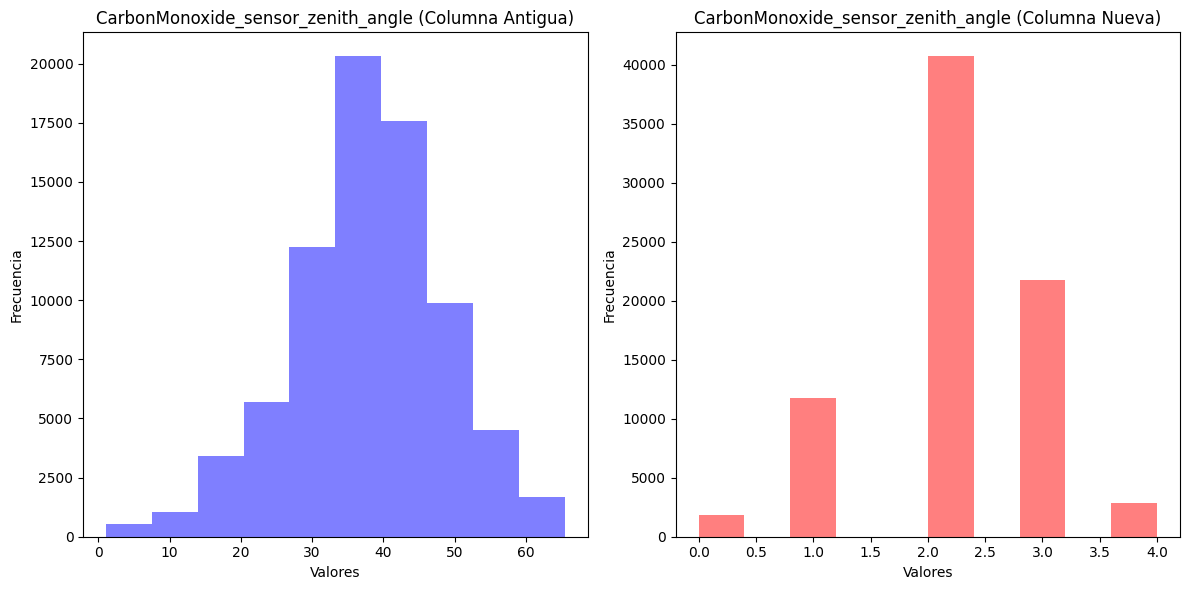

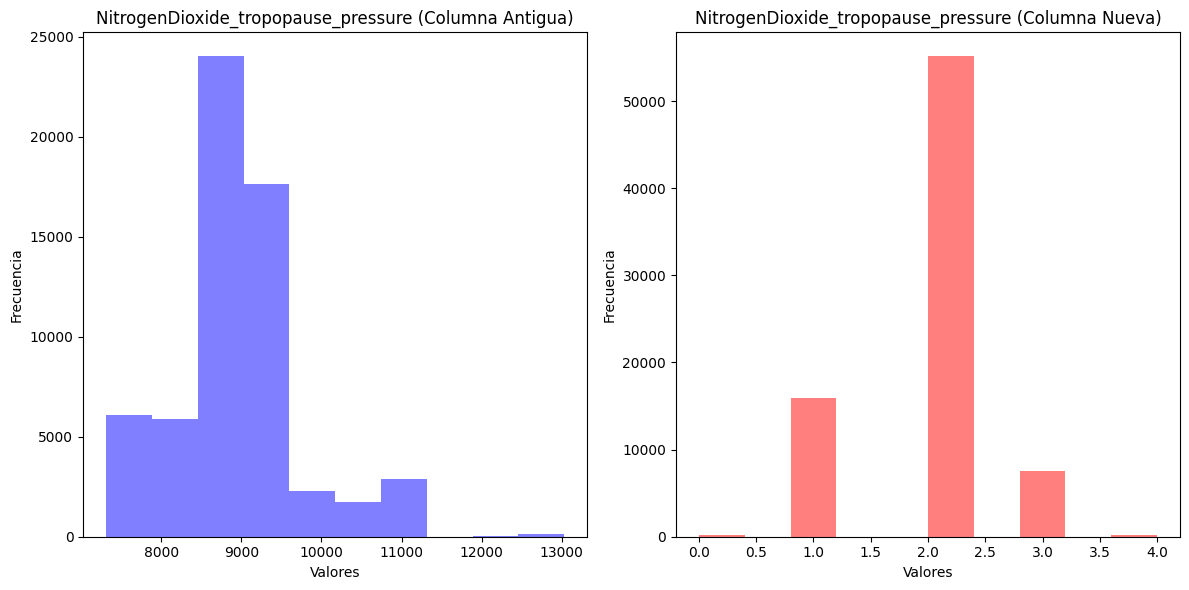

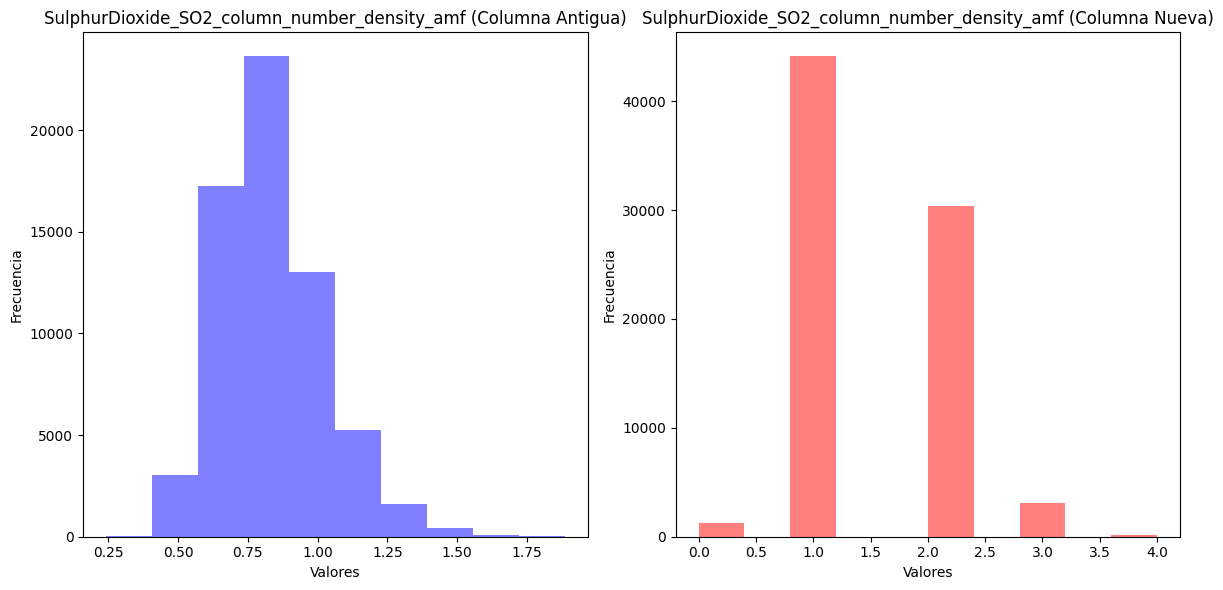

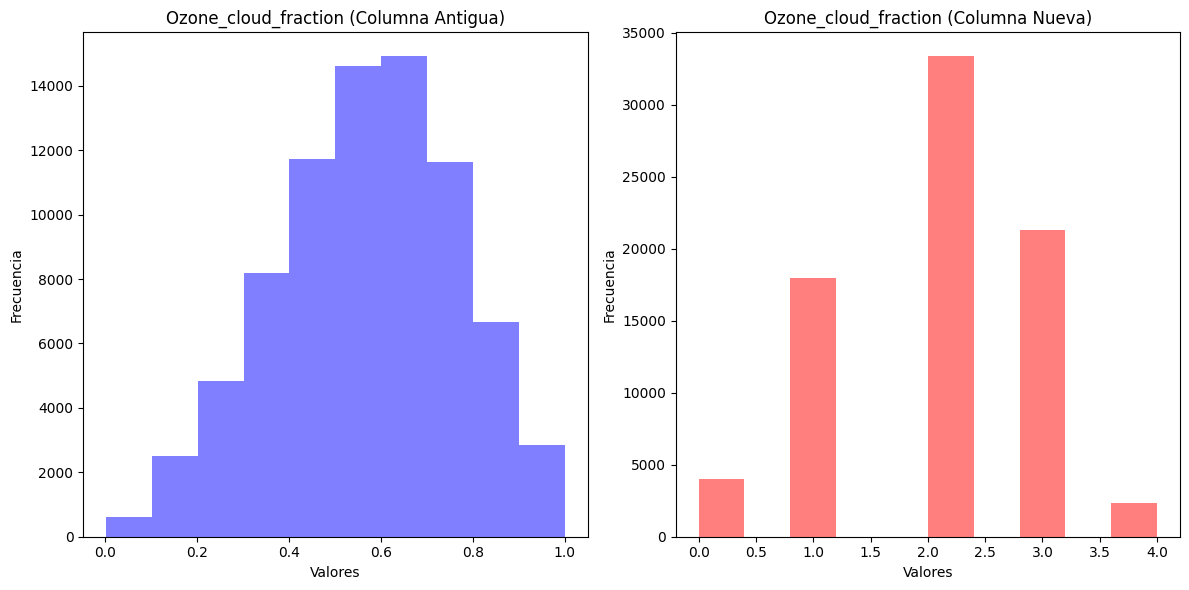

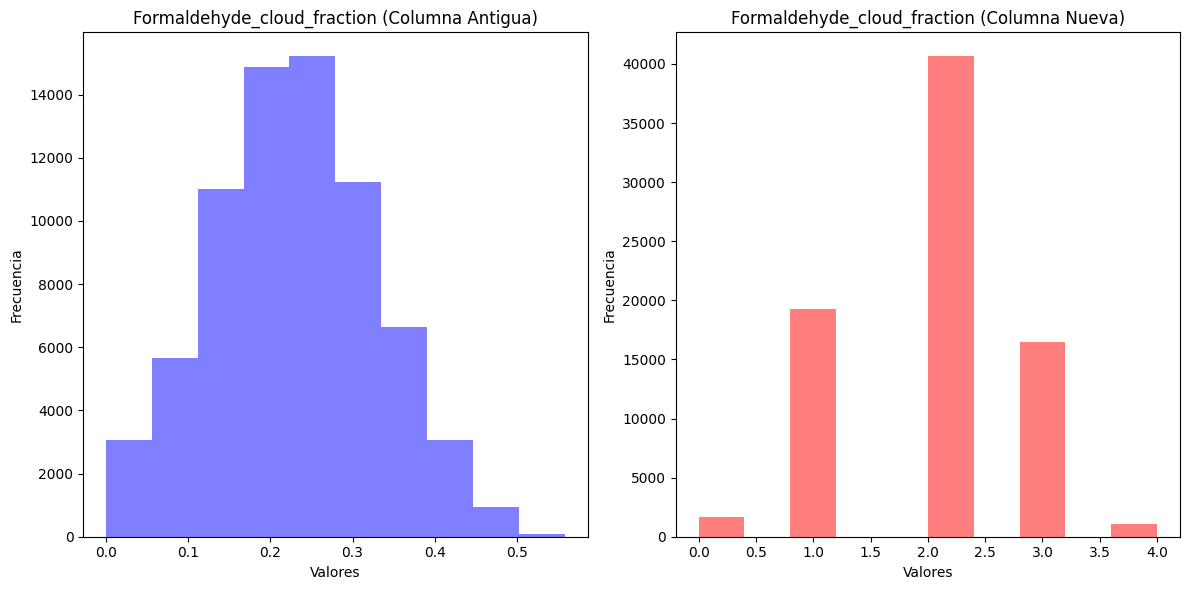

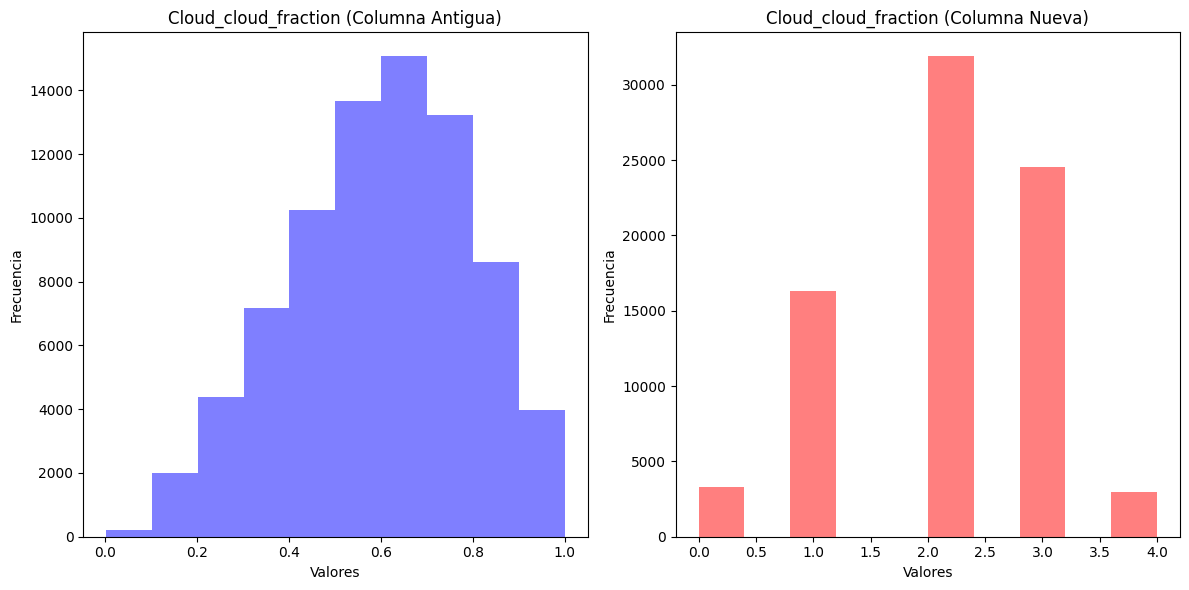

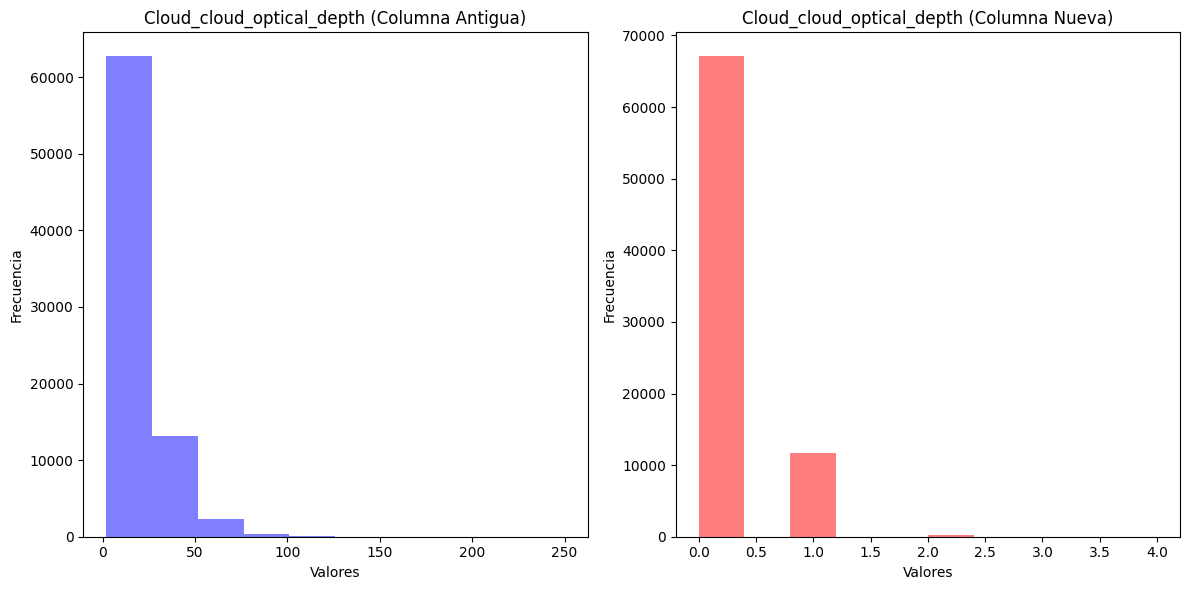

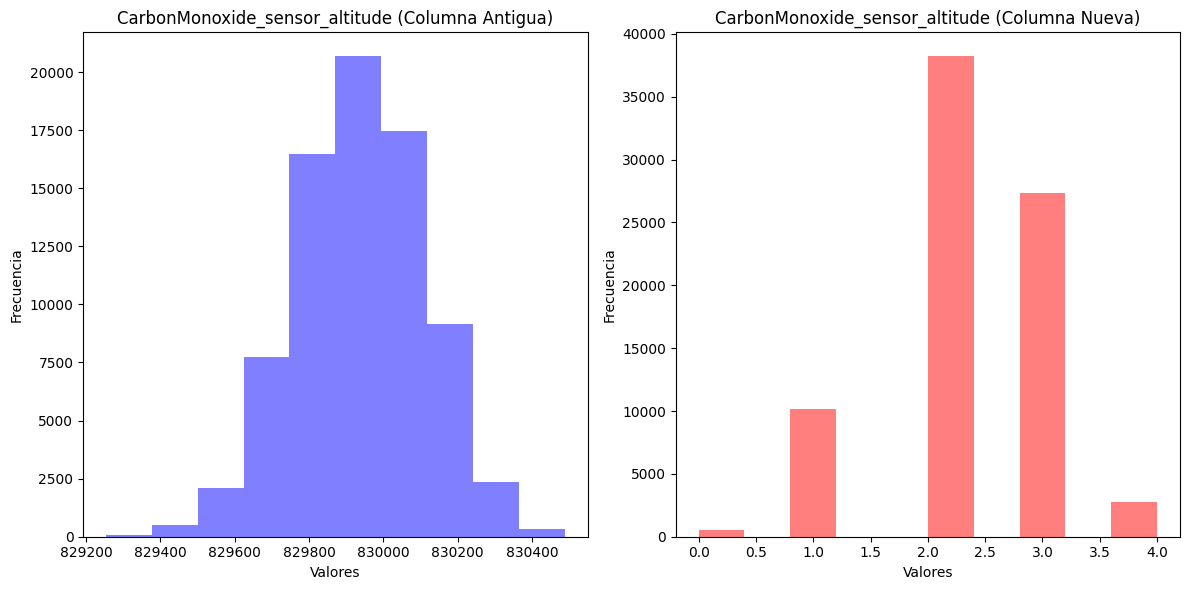

In [ ]:
for column in columnas_a_discretizar:
  compare_columns(column)

# **3. Descarga de la primera versión del dataframe**

In [ ]:
df1.to_csv('train_v1.csv', index=False)